<a href="https://colab.research.google.com/github/ArnavK04/PH354-Assignments/blob/main/Kumar_Arnav_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question - 1**

**1. (a)** For junction at $V_2$, equation is

$\frac{V_1-V_2}{R} + \frac{V_4-V_2}{R} - \frac{V_2}{R} = 0$

$\Rightarrow -V_1 +3V_2 - V_4 = 0$

For junction at $V_3$, equation is

$\frac{V_+-V_3}{R} + \frac{V_1-V_3}{R} + \frac{V_4-V_3}{R} = 0$

$\Rightarrow 3V_3 - V_1 - V_4 = V_+$

For junction at $V_4$, equation is

$\frac{V_3-V_4}{R} + \frac{V_1-V_4}{R} + \frac{V_2-V_4}{R} - \frac{V_4}{R} = 0$

$\Rightarrow -V_3 - V_1 - V_2 +4V_4 = 0$

In matrix form:

\begin{equation}
\begin{pmatrix}
4 & -1 & -1 & -1 \\
-1 & 3 & 0 & -1 \\
-1 & 0 & 3 & -1 \\
-1 & -1 & -1 & 4
\end{pmatrix}
⋅
\begin{pmatrix}
V_1 \\
V_2 \\
V_3\\
V_4
\end{pmatrix}
 =
\begin{pmatrix}
5 \\
0 \\
5\\
0
\end{pmatrix}
\end{equation}

**1. (b)**

In [3]:
import numpy as np

def do_GaussElim(A,b,N):
  for j in range(N):
    pivot = A[j,j]
    A[j] = A[j]/pivot
    b[j]=b[j]/pivot
    for i in range(j+1,N):
      fact = A[i,j]
      b[i] -= (fact * b[j])
      A[i] -= (fact * A[j])
  return A,b

def do_Backsubstitution(A,b,N):
  x = np.zeros(N)
  x[N-1] = b[N-1]
  for j in range(N-2,-1,-1):
    for i in range(j+1,N):
      x[j] -= x[i]*A[j,i]
    x[j] += b[j]
  return x

A_matrix = np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],dtype=float)
b_matrix = np.array([5,0,5,0],dtype=float)
A_,b_ = do_GaussElim(A_matrix,b_matrix,4)

x_ = do_Backsubstitution(A_,b_,4)

print(f"Solution for given problem is V_1,V_2,V_3,V_4 = {x_}")

Solution for given problem is V_1,V_2,V_3,V_4 = [3.         1.66666667 3.33333333 2.        ]


# **Question - 2**

**2. (a)**
Run 1. (b) first

In [5]:
# run Q.1 part (b) first

import numpy as np

def do_GaussElim_with_pivot(A,b,N):
  for j in range(N):
    pivot = A[j,j]
    if (pivot==0):
      max = A[j,j]
      row = j
      for k in range(j+1,N):
        if (abs(A[k,j])>abs(max)):
          max = A[k,j]
          row = k
      tempA = A[j].copy()
      A[j] = A[row]
      A[row] = tempA
      tempb = b[j].copy()
      b[j] = b[row]
      b[row] = tempb
    pivot = A[j,j]
    A[j] = A[j]/pivot
    b[j]=b[j]/pivot
    for i in range(j+1,N):
      fact = A[i,j]
      b[i] -= (fact * b[j])
      A[i] -= (fact * A[j])
  return A,b

A_matrix = np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],dtype=float)
b_matrix = np.array([5,0,5,0],dtype=float)
A__,b__ = do_GaussElim_with_pivot(A_matrix,b_matrix,4)

x__ = do_Backsubstitution(A__,b__,4)

print(f"Solution for given problem is V_1,V_2,V_3,V_4 = {x__}")

Solution for given problem is V_1,V_2,V_3,V_4 = [3.         1.66666667 3.33333333 2.        ]


**2. (b)** Run 1. (a) and 2. (a) first

In [6]:
A_matrix2 = np.array([[0,1,4,1],[3,4,-1,-1],[1,-4,1,5],[2,-2,1,3]],dtype=float)
b_matrix2 = np.array([-4,3,9,7],dtype=float)
A__2,b__2 = do_GaussElim_with_pivot(A_matrix2,b_matrix2,4)

x__2 = do_Backsubstitution(A__2,b__2,4)

print(f"Solution for given problem is V_1,V_2,V_3,V_4 = {x__2}")

Solution for given problem is V_1,V_2,V_3,V_4 = [ 1.61904762 -0.42857143 -1.23809524  1.38095238]


# **Question - 3**

In [ ]:
import numpy.linalg as linalg

A_matrix = np.array([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],dtype=float)
b_matrix = np.array([5,0,5,0],dtype=float)

print(linalg.solve(A_matrix,b_matrix))

[3.         1.66666667 3.33333333 2.        ]


# **Question - 4**

$V_+ = x_+e^{i\omega t}\ , V_1=x_1e^{i\omega t}\ , V_2 = x_2e^{i\omega t}\ , V_3=x_3e^{i\omega t}$

For junction $V_1$, the equation is

$\frac{V_+ - V_1}{R_1} + \frac{- V_1}{R_4} + C_1\frac{dV_2}{dt} - C_1\frac{dV_1}{dt} =0$

putting values and cancelling $e^{i\omega t}$ factors

$\Rightarrow \frac{x_+ - x_1}{R_1} + \frac{- x_1}{R_4} + C_1 i\omega x_2- C_1i\omega x_1 =0$

$\Rightarrow \left( \frac{1}{R_1} + \frac{1}{R_4} + i\omega C_1 \right)x_1 - i\omega C_1x_2 = \frac{x_+}{R_1}$

For junction $V_2$, the equation is

$\frac{V_+ - V_2}{R_2} + \frac{- V_2}{R_5} + C_2\left(\frac{dV_3}{dt} - \frac{dV_2}{dt} \right) + C_1\left( \frac{dV_1}{dt} - \frac{dV_2}{dt} \right)=0$

putting values and cancelling $e^{i\omega t}$ factors

$\Rightarrow \frac{x_+ - x_2}{R_2} + \frac{- x_2}{R_5} + C_2 i\omega x_3- C_2i\omega x_2 + C_1i\omega x_1 - C_1i\omega x_2 =0$

$\Rightarrow -C_1i\omega  x_1 + \left(\frac{1}{R_2} + \frac{1}{R_5} + C_2i\omega + C_1i\omega\right)x_2 - C_2 i\omega x_3   = \frac{x_+}{R_2}$

For junction $V_3$, the equation is

$\frac{V_+ - V_3}{R_3} + \frac{- V_3}{R_6} + C_2\left(\frac{dV_2}{dt} - \frac{dV_3}{dt} \right)=0$

putting values and cancelling $e^{i\omega t}$ factors

$\Rightarrow \frac{x_+ - x_3}{R_3} + \frac{- x_3}{R_6} + C_2 i\omega x_2- C_2i\omega x_3 =0$

$\Rightarrow - i\omega C_2x_2 + \left( \frac{1}{R_3} + \frac{1}{R_6} + i\omega C_2 \right)x_3 = \frac{x_+}{R_3}$

**4. (b)**

In [7]:
import numpy as np
import numpy.linalg as linalg
import cmath

R_5 = R_3 = R_1 = 1000
R_2 = R_4 = R_6 = 2000
C_1 = 1e-6
C_2 = 0.5e-6
x_plus = 3
omega = 1000
i= 0 + 1.0j

a_11 = 1/R_1 + 1/R_4 + i*omega*C_1
a_12 = a_21 = -i*omega*C_1
a_22 = 1/R_2 + 1/R_5 + i*omega*C_1 + i*omega*C_2
a_23 = a_32 = -i*omega*C_2
a_33 = 1/R_3 + 1/R_6 + i*omega*C_2

complex_matrix = np.array([[a_11, a_12, 0], [a_21, a_22, a_23], [0, a_32, a_33]])
rhs_vector = np.array([x_plus/R_1, x_plus/R_2, x_plus/R_3])

sol = linalg.solve(complex_matrix, rhs_vector)
print("The solutions V_1, V_2, V_3 with their amplitudes and phases are")

for i in range(3):
  amp,theta = cmath.polar(sol[i])
  print(f"Amplitude = {amp} V, phase = {theta} radians")


The solutions V_1, V_2, V_3 with their amplitudes and phases are
Amplitude = 1.7014390658777336 V, phase = -0.09545371433271416 radians
Amplitude = 1.4806053465364062 V, phase = 0.20216879328855678 radians
Amplitude = 1.8607693200562134 V, phase = -0.07268725004282395 radians


# **Question - 5**

**5. (a)**

In [8]:
import numpy as np

def find_QR(A,N):
  columns = np.zeros(N)
  R = np.zeros_like(A)
  Q = np.zeros_like(A)
  A = A.T   # transposing for better handeling columns
  R[0,0] = np.linalg.norm(A[0])
  Q[0] = A[0]/R[0,0]
  for i in range(1,N):
    Q[i]=A[i]
    for j in range(0,i):
      R[i,j] = np.dot(A[i],Q[j])
      Q[i] -= R[i,j]*Q[j]
    R[i,i]= np.linalg.norm(Q[i])
    Q[i] = Q[i]/R[i,i]
  return Q.T,R.T

A = np.array([[1,4,8,4],[4,2,3,7],[8,3,6,9],[4,7,9,2]],dtype=float)
Q,R = find_QR(A,4)

print(f"QR decomposition of A = {A} is")
print(f"Q = {Q},\nR = {R}")
print(f"QR = {Q@R}")


QR decomposition of A = [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]] is
Q = [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]],
R = [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]]
QR = [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]


**5. (b)** Run part 5(a) first.

In [9]:
import numpy as np

accuracy = 1e-6
A = np.array([[1,4,8,4],[4,2,3,7],[8,3,6,9],[4,7,9,2]],dtype=float)
V = np.eye(4)
err = 1
Q,R = find_QR(A,4)

while (err>accuracy):
  V = V@Q
  A_new = R@Q
  Q_new,R_new = find_QR(A_new,4)
  Q,R = Q_new,R_new
  max = 0
  for i in range(4):
    for j in range(4):
      if (i != j):
        if (abs(A_new[i,j])>max):
          max = abs(A_new[i,j])
  err = max
  print(err)

print(f" orthonormal matrix of eigenvectors is \nV={V}")
print(f"eigenvalues are {np.array([A_new[i,i] for i in range(4)])}")

9.074632384597278
3.7302083879908876
1.424727312028693
0.5428845995902339
0.2068213515123512
0.07878962418582747
0.030015129569937075
0.011434337254390156
0.004355938136426524
0.0016594050125580215
0.0006321542910073696
0.00024082068231258565
9.174121232566936e-05
3.4949033261553085e-05
1.3313917447341711e-05
5.071968545896974e-06
1.9321785080381405e-06
7.360679975904996e-07
 orthonormal matrix of eigenvectors is 
V=[[ 0.43151698 -0.38357064 -0.77459666 -0.25819889]
 [ 0.38357063  0.43151698 -0.2581989   0.77459667]
 [ 0.62330228  0.52740965  0.25819889 -0.51639778]
 [ 0.52740965 -0.62330227  0.51639779  0.25819889]]
eigenvalues are [21. -8. -3.  1.]


# **Question - 6**

**6. (a)** We have

$\hat{H} \psi = E\psi \Rightarrow \sum_{n=1}^{\infty} \hat{H}\psi_n\sin\frac{\pi nx}{L} = \sum_{n=1}^{\infty} E\psi_n\sin\frac{\pi nx}{L} $

Multiplying by $\sin \frac{\pi mx}{L}$ and integrating from 0 to L,

$ \int_0^L \sum_{n=1}^{\infty} \sin \frac{m \pi x}{L} \hat{H}\psi_n\sin\frac{\pi nx}{L} =\int_0^L \sum_{n=1}^{\infty} E \sin \frac{m \pi x}{L} \psi_n\sin\frac{\pi nx}{L} $

$ \sum_{n=1}^{\infty} \psi_n  \int_0^L \sin \frac{m \pi x}{L} \hat{H}\sin\frac{\pi nx}{L} = \sum_{n=1}^{\infty}\psi_n\delta_{mn}E \frac{L}{2} = \psi_nLE/2$

Therefore defining $H_{mn}$ as $\frac{2}{L}\int_0^L \sin \frac{m \pi x}{L} \hat{H}\sin\frac{\pi nx}{L}$ we have

$\sum H_{mn}\psi_n = \psi_n E$ or ${H\psi =  E\psi}$ where H and $\psi$ are infinite-dimensional matrix and vectors respectively.

**6. (b)** For $V(x) = ax/L$,

$H_{mn} = \frac{2}{L}\int_0^L \sin \frac{m \pi x}{L} \hat{H}\sin\frac{\pi nx}{L}\, dx$

$\Rightarrow H_{mn} = \frac{2}{L}\int_0^L \sin \frac{m \pi x}{L} \left( \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + ax/L \right)\sin\frac{\pi nx}{L}\, dx$

$\Rightarrow H_{mn} = \frac{2}{L}\int_0^L \sin \frac{m \pi x}{L} \left( \frac{-\hbar^2}{2m}\frac{d^2}{dx^2}\right)\sin\frac{\pi nx}{L}\, dx +  \frac{2}{L}\int_0^L \sin \frac{m \pi x}{L}\left( ax/L \right)\sin\frac{\pi nx}{L}\, dx$

$\Rightarrow H_{mn} =\frac{n^2\pi^2}{L^2}\frac{\hbar^2}{2m} \frac{2}{L}\int_0^L \sin \frac{m \pi x}{L} \sin\frac{\pi nx}{L}\, dx +  \frac{2a}{L^2}\int_0^L \sin \frac{m \pi x}{L} x \sin\frac{\pi nx}{L}\, dx$

$\Rightarrow H_{mn} =\frac{n^2\pi^2}{L^2}\frac{\hbar^2}{2m}\delta_{mn} +  \frac{2a}{L^2}\int_0^L \sin \frac{m \pi x}{L} x \sin\frac{\pi nx}{L}\, dx$

Therefore we have

$H_{mn} =
\begin{cases}
0 & \text{if } m \neq n \text{ and both even, or both odd} \\
-\frac{2a}{L^2}\left(\frac{2L}{\pi}\right)^2 \frac{mn}{(m^2-n^2)^2} & \text{if } m \neq n \text{ and one even, one odd} \\
\frac{n^2\pi^2}{L^2}\frac{\hbar^2}{2m} + \frac{a}{2} & \text{ if } m=n
\end{cases}
$

From above expression, it is clear that the matrix is real and symmetric.

In [13]:
import math

def calculate_hamiltonian(m,n):
  L = 5e-10
  a = 10*1.6e-19
  m_e = 9.1e-31
  q = -1.6e-19
  hbar = 6.626e-34/(2*math.pi)
  if (m!=n):
    if ((m+n)%2==0):
      return 0.0
    else:
      factor = -8*a/(math.pi**2)
      return factor*m*n/((m*m-n*n)**2)
  else:
    return n*n*math.pi*math.pi*hbar*hbar/(L*L*2*m_e) + a/2

**6. (c)**

In [14]:
import numpy as np

H_matrix = np.zeros((10,10))

for i in range(10):
  for j in range(10):
    H_matrix[i,j] = calculate_hamiltonian(i+1,j+1)

eigvalues,eigvectors = np.linalg.eigh(H_matrix)

print(f"eigenvalues in eV are {eigvalues/(1.6e-19)}")

eigenvalues in eV are [  5.84131715  11.19516927  18.6947111   29.20109139  42.74413658
  59.31359678  78.90409775 101.51374575 127.14030208 155.91173119]


**6. (d)**

In [16]:
import numpy as np

N=100

H_matrix100 = np.zeros((N,N))

for i in range(N):
  for j in range(N):
    H_matrix100[i,j] = calculate_hamiltonian(i+1,j+1)

eigvalues100,eigvectors100 = np.linalg.eigh(H_matrix100)

print(f"eigenvalues in eV are {eigvalues100[:10]/(1.6e-19)}")

eigenvalues in eV are [  5.84131675  11.19516795  18.69470923  29.20108262  42.74412748
  59.31354433  78.90404606 101.51311642 127.13947302 155.782414  ]


Comparing the eigenvalues obtained above with those in part(c) we can say that using 100 dimensional matrices doesn't improve our estimates much compared to using 10 dimensional matrix. Therefore for practical purposes, good estimates can be obtained by taking small finite-dimensional matrices instead of the full infinite-dimensional matrix.

**6. (e)** Part (d) already calculates the first 100 eigenvectors. We will just reuse the variable eigvectors100 which stores them.

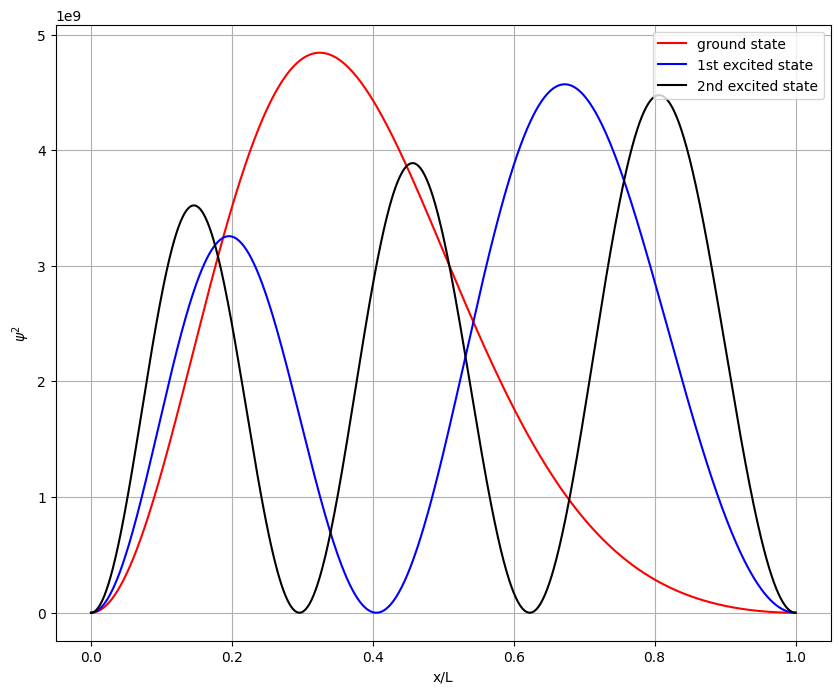

normalization - integral of psi^2 from 0 to L is 1.0 for ground state
normalization - integral of psi^2 from 0 to L is 1.0000000000000002 for 1st excited state
normalization - integral of psi^2 from 0 to L is 1.0000000000000002 for 2nd excited state


In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

L=5e-10
N=100

def give_psi_n_contri(c_n,n,x):
  # gives c_n * \psi_n
  # total wavefunction is \sum c_n * \psi_n
  return c_n * math.sin(n*math.pi*x/L)

def give_total_psi(x,m):
  # returns mth wavefunction
  psi = 0
  for i in range(1,N+1):
    psi += give_psi_n_contri(eigvectors100[i-1,m-1],i,x)
  return psi

x_values = np.linspace(0,L,1000)
psi_grd = np.vectorize(give_total_psi)(x_values,1)
psi_grd /= math.sqrt((np.trapezoid(psi_grd**2,x_values)))
psi_1 = np.vectorize(give_total_psi)(x_values,2)
psi_1 /= math.sqrt(np.trapezoid(psi_1**2,x_values))
psi_2 = np.vectorize(give_total_psi)(x_values,3)
psi_2 /= math.sqrt(np.trapezoid(psi_2**2,x_values))

plt.figure(figsize=(10,8))

plt.plot(x_values/L, psi_grd**2, color="red", label="ground state")         # \psi is real so just squaring
plt.plot(x_values/L, psi_1**2, color="blue", label="1st excited state")
plt.plot(x_values/L, psi_2**2, color="black", label="2nd excited state")
plt.legend(loc="upper right")
plt.ylabel(r"$\psi^2$")
plt.xlabel("x/L")
plt.grid()
plt.show()
print(f"normalization - integral of psi^2 from 0 to L is {np.trapezoid(psi_grd**2,x_values)} for ground state")
print(f"normalization - integral of psi^2 from 0 to L is {np.trapezoid(psi_1**2,x_values)} for 1st excited state")
print(f"normalization - integral of psi^2 from 0 to L is {np.trapezoid(psi_2**2,x_values)} for 2nd excited state")

The wavefunctions were not initially normalised. eigh returns normalised vectors but we multiplied them by sin so had to normalize again. Normalization in functions is different than normalization of vectors.

# **Question - 7**

**7. (a)** For fixed points

$x^2y+ay-x=0\ ;\ x^2y + ay - b = 0$

an obvious solution is $x=b$. Putting this in,

$b^2y + ay - b = 0$

$\Rightarrow y = \frac{b}{b^2+a}$

**7. (b)** Taking the equation, $-x+ay+x^2y = 0$, we get

$x = y(a+x^2)$

Taking the equation, $-b+ay+x^2y = 0$, we get

$y = \frac{b}{a+x^2}$

In [18]:
import math

a = 1
b = 2

def next_xy(x,y):
  x_new = y*(a+x**2)
  y_new = b/(a+x**2)
  return x_new, y_new

err = 1
count = 0
x_,y_ = (0.5,0.5)
while(err>1e-6):
  x_new,y_new = next_xy(x_,y_)
  count += 1
  err = math.sqrt((x_new-x_)**2 + (y_new-y_)**2)
  x_,y_ = x_new,y_new
  if (count>1000):
    print("not converging")
    print(f"error is currently {err}")
    break

not converging
error is currently 1.6314868308457637


**7. (c)** Since $x=b$, we can rewrite the equations above as

$b=y(a+x^2) \Rightarrow x = \sqrt{b/y-a}$

and $y = \frac{x}{a+b^2}$

Therefore rewriting the above program,

In [19]:
import math

a = 1
b = 2

def next_xy(x,y):
  x_new = math.sqrt(b/y - a)
  y_new = x/(a+b**2)
  return x_new, y_new

err = 1
count = 0
x_,y_ = (0.5,0.5)
while(err>1e-6):
  x_new,y_new = next_xy(x_,y_)
  count += 1
  err = math.sqrt((x_new-x_)**2 + (y_new-y_)**2)
  x_,y_ = x_new,y_new
  if (count>1000):
    print("not converging")
    print(err)
    break

print(f"The solutions are x = {x_}, y = {y_}")
print(f"error is {err}")

The solutions are x = 1.999999168605473, y = 0.40000002679843377
error is 9.945908946805162e-07


# **Question - 8**

For $I(\lambda)$ to be maximum, the derivative wrt $\lambda$ needs to be zero.

$\Rightarrow \frac{dI}{d\lambda} = 0 $

$\Rightarrow \frac{(e^{hc/\lambda kT} - 1)(-10\pi hc^2\lambda^{-6}) - 2\pi hc^2\lambda^{-5}e^{hc/\lambda kT}(hc/kT)(-1/\lambda^2)}{ ( e^{hc/\lambda kT} - 1)^2}=0$

$ \Rightarrow 5(e^{hc/\lambda kT}-1)\lambda^{-1}  - e^{hc/\lambda kT}(hc/kT)\lambda^{-2} = 0$

$ \Rightarrow 5(e^{hc/\lambda kT}-1)\lambda  - e^{hc/\lambda kT}(hc/kT) = 0$

Taking $hc/\lambda kT = x$

$\Rightarrow 5(e^x - 1)\lambda - e^x(x\lambda) = 0$

$\Rightarrow 5(e^x-1) - xe^x = 0$

By finding the solution of above equation, we can find $x_{max}$ and hence $\lambda_{max} = hc/x_{max}kT$. Clearly, $\lambda_{max} \propto 1/T$

In [20]:
import math

def solve_bisection(func, low, high, accuracy):
  if (func(low)*func(high)>0):
    print("function at both limits should have different signs")
    return None
  error = 1
  while(error>accuracy):
    c = (low+high)/2.
    if (func(c)*func(low)<0):
      high = c
    else:
      low = c
    error = high-low
  return (high+low)/2., error

def equation(x):
  return (5*(math.exp(x)-1) - x*math.exp(x))

# By inspection root lies between 4 and 6
print(f"Solution to the relevant equation is x_max = {solve_bisection(equation,4,6,1e-6)[0]} with error = {solve_bisection(equation,4,6,1e-6)[1]}")

Solution to the relevant equation is x_max = 4.965114116668701 with error = 9.5367431640625e-07


From above, we get $x_{max} \approx 4.965114$

$\Rightarrow \lambda_{max} = hc/x_{max}kT = hc/(4.965114\ kT)$

Therefore Weins constant is $\frac{hc}{4.965114 k} \approx 0.0029$

**8. (b)** Wavelength of maximum emission for Sun is $\lambda = 502\ nm$. Therefore the temperature of sun is $\frac{0.0029}{502\ nm} \approx 5777\ K$

# **Question - 9**

**9. (a)**

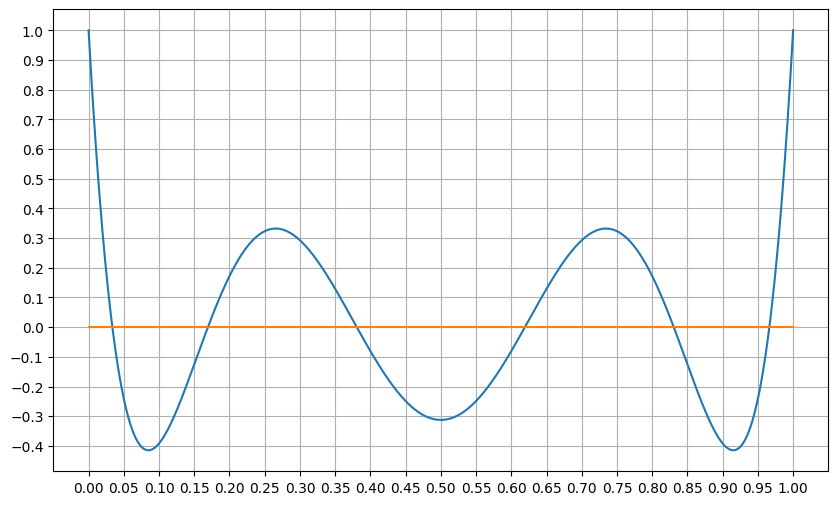

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

def P_x(x):
  return 924*math.pow(x,6) - 2772*math.pow(x,5) + 3150*math.pow(x,4) - 1680*math.pow(x,3) + 420*x**2 - 42*x + 1

def P_dash_x(x):
  return 6*924*math.pow(x,5) - 5*2772*math.pow(x,4) + 4*3150*math.pow(x,3) - 3*1680*x**2 + 2*420*x - 42

def P_dash_dash_x(x):
  return 5*6*924*math.pow(x,4) - 4*5*2772*math.pow(x,3) + 3*4*3150*math.pow(x,2) - 2*3*1680*x + 2*420

x_values = np.linspace(0,1,1000)
func_values = np.vectorize(P_x)(x_values)

plt.figure(figsize=(10,6))
plt.plot(x_values, func_values)
plt.xticks(np.arange(0,1.05,0.05))
plt.yticks(np.arange(-1,1.1,0.1))
plt.plot(x_values, np.zeros_like(x_values))
plt.grid(True)
plt.show()

The above plot shows that the roots are approximately near $x\approx 0.035,0.165,0.38,0.62,0.83$

**9. (b)** From the above plot, we can make good guesses for the Newton-Raphson method we implement below. Before running below code, run part (a) first. Functions are defined there.

In [22]:
def Find_Newton_root(function,derivative,double_deriv,guess,accuracy):
  error = 1
  x_n = guess
  while(error > accuracy):
    x_new = x_n - function(x_n)/derivative(x_n)
    error = abs(x_new - x_n)
    x_n = x_new
  return x_new, error

Guesses_array = np.array([0.035,0.165,0.38,0.62,0.83])
for guess in Guesses_array:
  Root = Find_Newton_root(P_x,P_dash_x,P_dash_dash_x, guess, 1e-10)
  print(f"Root is {Root[0]} with error = {Root[1]}")

Root is 0.03376524289842398 with error = 7.147060721024445e-16
Root is 0.16939530676686795 with error = 5.551115123125783e-16
Root is 0.38069040695840195 with error = 2.919886554764162e-14
Root is 0.6193095930415999 with error = 3.8413716652030416e-14
Root is 0.8306046932331279 with error = 1.820210648872944e-12


# **Question - 10**

**10. (a)** Equation for node 1 is

$ \frac{V_+ - V_1}{R_1} +  \frac{- V_1}{R_2} + I_0(e^{(V_2-V_1)/V_T}-1) = 0 $

Equation for node 2 is

$ \frac{V_+ - V_2}{R_3} +  \frac{- V_2}{R_4} + I_0(e^{(V_1-V_2)/V_T}-1) = 0 $

**10. (a)**

In [2]:
import numpy as np

R1 = 1e3
R2 = 4e3
R3 = 3e3
R4 = 2e3
I0 = 3e-9
VT = 0.05
Vp = 5.0

def f(x):
    V1, V2 = x
    Id = I0*(np.exp((V1-V2)/VT) - 1)

    f1 = (V1 - Vp)/R1 + V1/R2 + Id
    f2 = (V2 - Vp)/R3 + V2/R4 - Id

    return np.array([f1, f2])

def jacobian(x):
    V1, V2 = x
    exp_term = np.exp((V1-V2)/VT)
    dId_dV1 = I0/VT * exp_term
    dId_dV2 = -I0/VT * exp_term

    J11 = 1/R1 + 1/R2 + dId_dV1
    J12 = dId_dV2
    J21 = -dId_dV1
    J22 = 1/R3 + 1/R4 - dId_dV2

    return np.array([[J11, J12],
                     [J21, J22]])


x = np.array([2.5, 2.5])  # initial guess

for _ in range(50):
    x = x - np.linalg.solve(jacobian(x), f(x))

V1, V2 = x
print("V1 =", V1)
print("V2 =", V2)
print("Diode voltage =", V1 - V2)

V1 = 3.4469546188585745
V2 = 2.8295680717121385
Diode voltage = 0.6173865471464359


**10. (b)** From above code, it is clear that the diode voltage is approximately 0.6 volts.